<h1 align='center'>EE2703 Applied Programming Lab</h1>
<h2 align='center'>Assignment 6</h2>
<h3 align='center'>March 12, 2018</h3>
<h3 align='center'>Rajat Vadiraj Dwaraknath EE16B033</h3>

# Introduction
In this assignment, we model a tubelight as a one dimensional space of gas in which electrons are continually injected at the cathode and accelerated towards the anode by a constant electric field. The electrons can ionize material atoms if they achieve a velocity greater than some threshold, leading to an emission of a photon. This ionization is modeled as a random process. The tubelight is simulated for a certain number of timesteps from an initial state of having no electrons. The results obtained are plotted and studied.

In [1]:
%%capture
# Importing numpy and matplotlib
%pylab inline 
from IPython.display import *

In [2]:
# Increase figure and font size
rcParams['figure.figsize'] = 12,9
rcParams['font.size'] = 18
rcParams['text.usetex'] = True

In [3]:
%%capture
%%writefile get_args.py

import sys
import argparse

ARGS = {"n":100,
       "M":5,
       "nk":500,
       "u0":5,
       "p":0.25,
       "Msig":1}

def addargs(args,parser):
    for arg in args:
        parser.add_argument('-{}'.format(arg),default=args[arg],type=type(args[arg]))
        
ap = argparse.ArgumentParser()
addargs(ARGS,ap)
args = ap.parse_args()

for arg in ARGS:
    exec("{} = args.{}".format(arg,arg))
    

# The simulation
A function to simulate the tubelight given certain parameters is written below:

In [4]:
def simulateTubelight(n,M,nk,u0,p,Msig,accurateCollisions=False):
    """
    Simulate a tubelight and return the electron positions and velocities,
    and positions of photon emissions.
    
    n: integer length of tubelight
    M: average number of electrons generated per timestep
    nk: total number of timesteps to simulate
    u0: threshold voltage for ionization
    p: probability of ionization given an electron is faster than the threshold
    Msig: stddev of number of electrons generated per timestep
    
    
    """

    xx = zeros(n*M)
    u = zeros(n*M)
    dx = zeros(n*M)

    I = []
    X = []
    V = []

    for k in range(nk):

        # add new electrons
        m=int(randn()*Msig+M)
        jj = where(xx==0)
        xx[jj[0][:m]]=1

        # find electron indices
        ii = where(xx>0)

        # add to history lists
        X.extend(xx[ii].tolist())
        V.extend(u[ii].tolist())

        # update positions and speed
        dx[ii] = u[ii]+0.5
        xx[ii]+=dx[ii]
        u[ii]+=1

        # anode check
        kk = where(xx>=n)
        xx[kk]=0
        u[kk]=0

        # ionization check
        kk = where(u>=u0)[0]
        ll=where(rand(len(kk))<=p);
        kl=kk[ll];

        # ionize
        dt = rand(len(kl))
        #xx[kl]=xx[kl]-dx[kl]+((u[kl]-1)*dt+0.5*dt*dt)
        xx[kl]=xx[kl]-dx[kl]*dt

        u[kl]=0

        # add emissions
        I.extend(xx[kl].tolist())
        
    return X,V,I


# Plots
A function to plot the required graphs is written below:

In [5]:
def plotGraphs(X,V,I):
    """
    Plot histograms for X and I, and a phase space using X and V.
    Returns the emission intensities and locations of histogram bins.
    """
    
    # electron density
    figure()
    hist(X,bins=n,cumulative=False)
    title("Electron density")
    xlabel("$x$")
    ylabel("Number of electrons")
    show()

    # emission instensity
    figure()
    ints,bins,trash = hist(I,bins=n)
    title("Emission Intensity")
    xlabel("$x$")
    ylabel("I")
    show()

    # electron phase space
    figure()
    scatter(X,V,marker='x')
    title("Electron Phase Space")
    xlabel("$x$")
    ylabel("$v$")
    show()
    
    return ints,bins

# Running the simulation
The tubelight is simulated with the default parameters of $n=100$, $M=5$, $nk=500$ and $Msig=1$. A threshold speed of $u0 = 7$, and an ionization probability of $p=0.5$ are chosen.

In [6]:
%%capture
%run get_args.py -u0=7 -p=0.5

In [7]:
X,V,I = simulateTubelight(n,M,nk,u0,p,Msig)

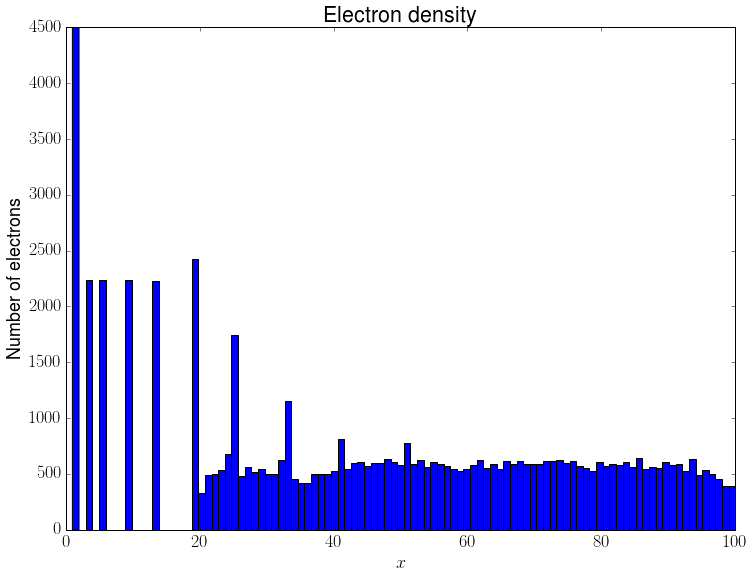

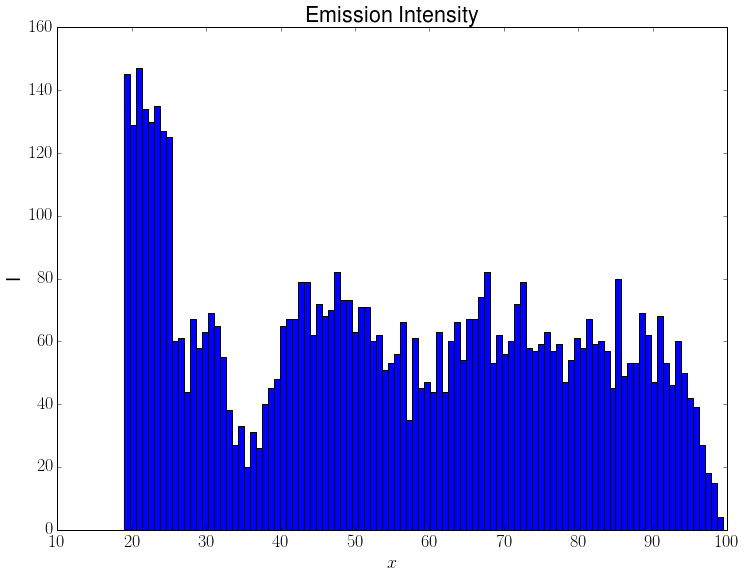

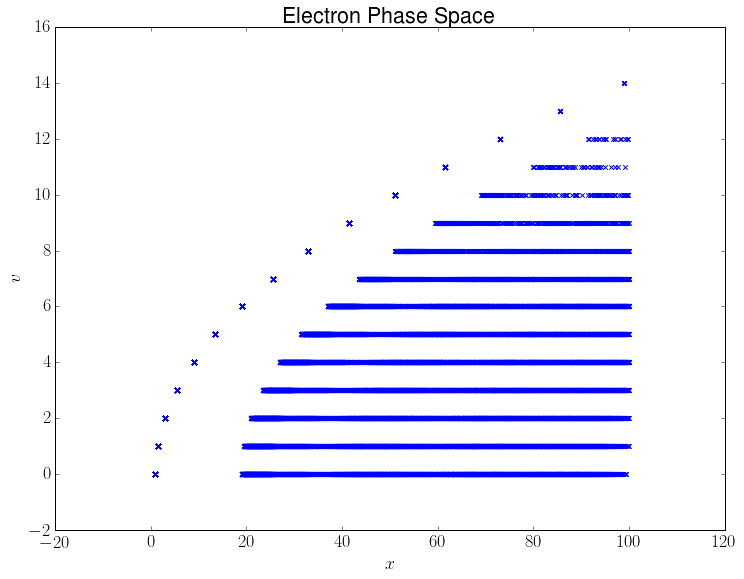

In [8]:
ints, bins = plotGraphs(X,V,I)

We can make the following observations from the above plots:

* The electron density is peaked at the initial parts of the tubelight as the electrons are gaining speed here and are not above the threshold. This means that the peaks are the positions of the electrons at the first few timesteps they experience.

* The peaks slowly smoothen out as $x$ increases beyond $25$. This is because the electrons achieve a threshold speed of $7$ only after traversing a distance of $25$ units. This means that they start ionizing the gas atoms and lose their speed due to an inelastic collision.

* The emission intensity also shows peaks which get diffused as $x$ increases. This is due the same reason as above. Most of the electrons reach the threshold at roughly the same positions, leading to peaks in the number of photons emitted there.

* This phenomenon can also be seen in the phase space plot. Firstly, the velocities are restricted to discrete values, as the acceleration is set to $1$.

* One trajectory is separated from the rest of plot. This corresponds to those electrons which travel until the anode without suffering any inelastic collisions with gas atoms. This can be seen by noticing that the trajectory is parabolic. This means that $v \space = k \sqrt{x}$, which is precisely the case for a particle moving with constant acceleration.

* The rest of the plot corresponds to the trajectories of those electrons which have suffered at least one collision with an atom. Since the collisions can occur over a continuous range of positions, the trajectories encompass all possible positions after $x=25$.

The emission count for each value of $x$ is tabulated below:

In [9]:
xpos=0.5*(bins[0:-1]+bins[1:])
from tabulate import *
print("Intensity Data")
print(tabulate(stack((xpos,ints)).T,["xpos","count"]))

Intensity Data
   xpos    count
-------  -------
19.4043      145
20.2092      129
21.0141      147
21.819       134
22.6239      130
23.4288      135
24.2337      127
25.0386      125
25.8435       60
26.6484       61
27.4533       44
28.2583       67
29.0632       58
29.8681       63
30.673        69
31.4779       65
32.2828       55
33.0877       38
33.8926       27
34.6975       33
35.5024       20
36.3073       31
37.1122       26
37.9171       40
38.722        45
39.5269       48
40.3318       65
41.1367       67
41.9416       67
42.7465       79
43.5514       79
44.3563       62
45.1612       72
45.9661       68
46.7711       70
47.576        82
48.3809       73
49.1858       73
49.9907       63
50.7956       71
51.6005       71
52.4054       60
53.2103       62
54.0152       51
54.8201       53
55.625        56
56.4299       66
57.2348       35
58.0397       61
58.8446       45
59.6495       47
60.4544       44
61.2593       63
62.0642       44
62.8691       60
63.674        66

# Different set of parameters
The simulation is repeated using a different set of parameters. Namely, the threshold velocity is greatly reduced to $u0=2$, and the ionization probability is increased to $0.9$.

In [10]:
%%capture
%run get_args.py -u0=2 -p=0.9

In [11]:
X,V,I = simulateTubelight(n,M,nk,u0,p,Msig)

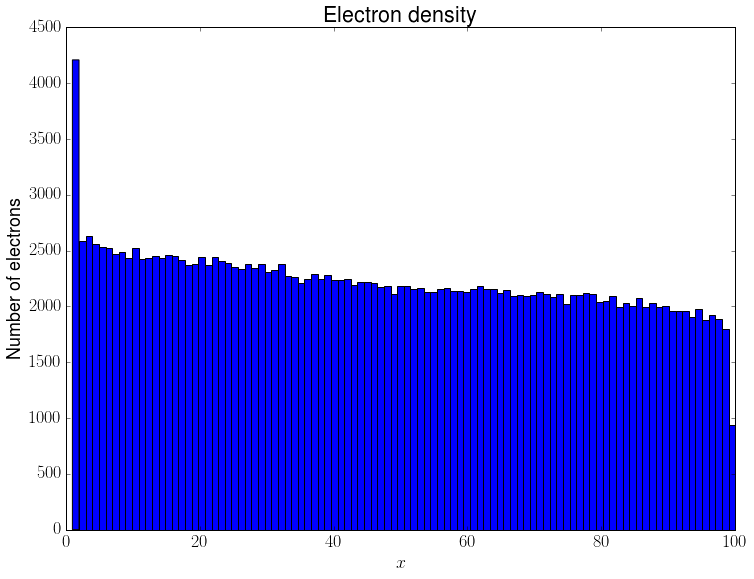

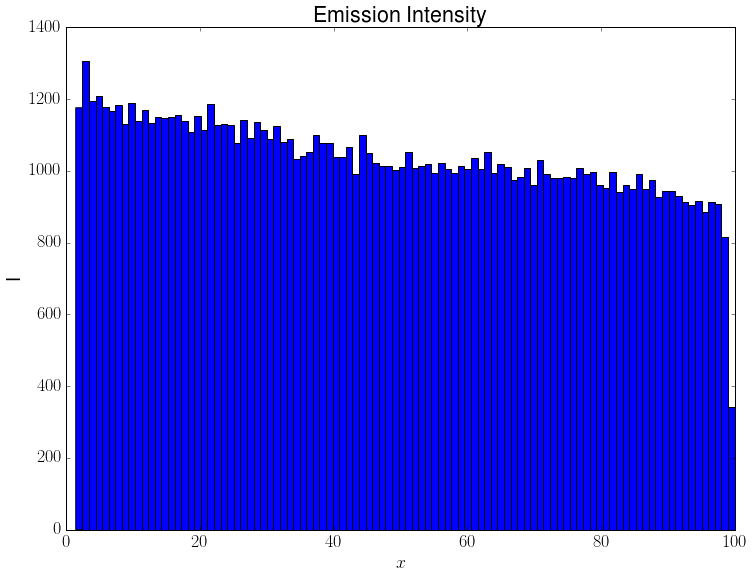

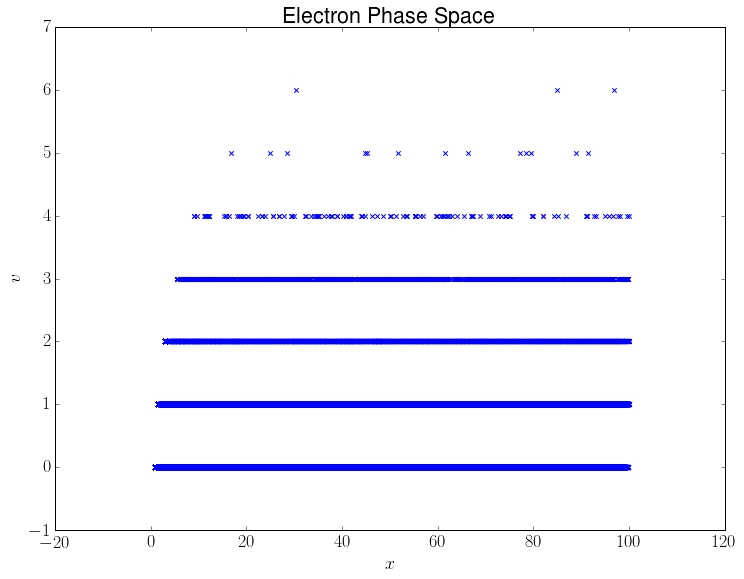

In [12]:
ints, bins = plotGraphs(X,V,I)

# Conclusion
We can make the following conclusions from the above plots:  

* Since the threshold speed is much lower, photon emission starts occuring from a much lower value of x. This means that the electron density is more evenly spread out. It also means that the emission intensity is very smooth, and the emission peaks are very diffused.

* Since the probability of ionization is very high, total emission intensity is also relatively higher compared to the first case.

* We can conclude from the above observations that a gas which has a lower threshold velocity and a higher ionization probability is better suited for use in a tubelight, as it provides more uniform and a higher amount of photon emission intensity.


In [13]:
def simulateTubelightAnim(n,M,nk,u0,p,Msig):
    """
    Simulate a tubelight and return the electron positions and velocities,
    and positions of photon emissions.
    
    n: integer length of tubelight
    M: average number of electrons generated per timestep
    nk: total number of timesteps to simulate
    u0: threshold voltage for ionization
    p: probability of ionization given an electron is faster than the threshold
    Msig: stddev of number of electrons generated per timestep
    
    """

    xx = zeros(n*M)
    u = zeros(n*M)
    dx = zeros(n*M)
    imageList = []

    I = []
    X = []
    V = []
    
    x = linspace(0,100,2000)

    for k in range(nk):

        # add new electrons
        m=int(randn()*Msig+M)
        jj = where(xx==0)
        xx[jj[0][:m]]=1

        # find electron indices
        ii = where(xx>0)

        # add to history lists
        X.extend(xx[ii].tolist())
        V.extend(u[ii].tolist())

        # update positions and speed
        dx[ii] = u[ii]+0.5
        xx[ii]+=dx[ii]
        u[ii]+=1

        # anode check
        kk = where(xx>=n)
        xx[kk]=0
        u[kk]=0

        # ionization check
        kk = where(u>=u0)[0]
        ll=where(rand(len(kk))<=p);
        kl=kk[ll];

        # ionize
        dt = rand(len(kl))
        #xx[kl]=xx[kl]-dx[kl]+((u[kl]-1)*dt+0.5*dt*dt)
        xx[kl]=xx[kl]-dx[kl]*dt

        u[kl]=0

        # add emissions
        I.extend(xx[kl].tolist())
        
        elecs = zeros(2000)
        for e in kl:    
            elecs[where((x-xx[e])<1e-7)]+=.5
        elecs = stack((elecs,elecs,elecs)).T
        #print(stack([elecs for i in range(100)]).shape)
        img = stack([elecs for i in range(100)])
        #img = 255*img/(img.max()+1)
        imageList.append(img)
        
    return X,V,I,imageList

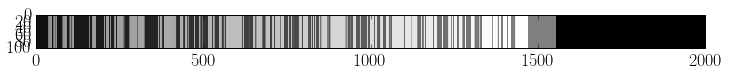

In [14]:
X,V,I,imlist = simulateTubelightAnim(n,M,150,2,0.9,Msig)
imshow(imlist[100])

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


imlist = [(imlist[i-1]+imlist[i]+imlist[i+1])/3 for i in 1+arange(len(imlist)-2)]
imlist = [(imlist[i-1]+imlist[i]+imlist[i+1])/3 for i in 1+arange(len(imlist)-2)]
imlist = [(imlist[i-1]+imlist[i]+imlist[i+1])/3 for i in 1+arange(len(imlist)-2)]

imageList = imlist
fig = plt.figure(figsize=(8, 8))
ims = []

for i in range(len(imageList)):
    im = plt.imshow(imageList[i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani.to_html5_video())